### 데이터관찰: 분석 도구 불러오기
_참고: PDF 3.10-3.13 데이터관찰 (python)_
pandas와 시각화 라이브러리를 불러와 분석 환경을 초기화합니다.


In [10]:
# 분석/시각화/ML 기본 모듈 로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

sns.set_theme(style='whitegrid')


### 데이터관찰: Iris DataFrame 구성
_참고: PDF 3.1-3.12 데이터관찰 (python)_
Iris 데이터를 불러 DataFrame을 만들고 품종 식별 컬럼을 추가합니다.


In [11]:
# Iris 데이터를 로드하고 species 라벨을 추가한 DataFrame 구성
iris = datasets.load_iris()
feature_names = iris.feature_names

df = pd.DataFrame(iris.data, columns=feature_names)
df['species_id'] = iris.target
df['species'] = df['species_id'].apply(lambda idx: iris.target_names[idx])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### 데이터관찰: 품종별 통계 요약
_참고: PDF 3.9-3.12 데이터관찰 (python)_
품종별 평균과 표준편차를 계산해 어떤 특징이 다른지 파악합니다.


In [12]:
# 품종별 평균/표준편차로 특성 차이 파악
df.groupby('species')[feature_names].agg(['mean', 'std'])


sepal length (cm)           sepal width (cm)            \
                        mean       std             mean       std   
species                                                             
setosa                 5.006  0.352490            3.428  0.379064   
versicolor             5.936  0.516171            2.770  0.313798   
virginica              6.588  0.635880            2.974  0.322497   

           petal length (cm)           petal width (cm)            
                        mean       std             mean       std  
species                                                            
setosa                 1.462  0.173664            0.246  0.105386  
versicolor             4.260  0.469911            1.326  0.197753  
virginica              5.552  0.551895            2.026  0.274650

### 데이터관찰: Boxplot 시각화
_참고: PDF 3.14-3.17 데이터관찰 (python)_
각 특성에 대한 boxplot으로 품종별 분포 차이를 시각화합니다.


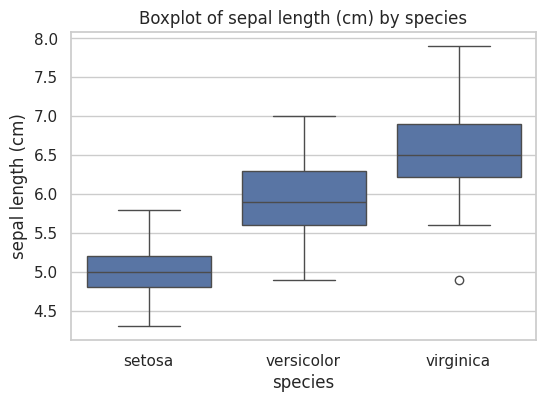

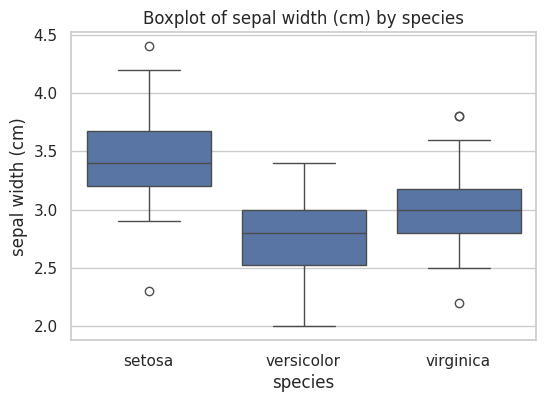

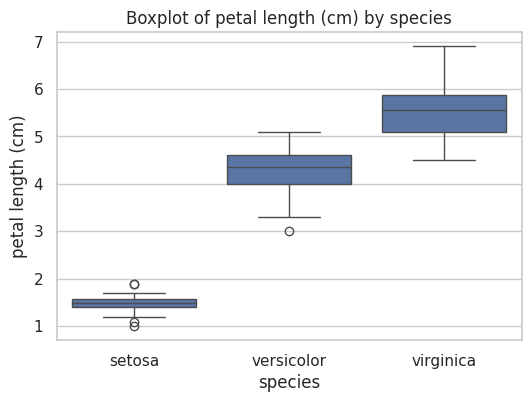

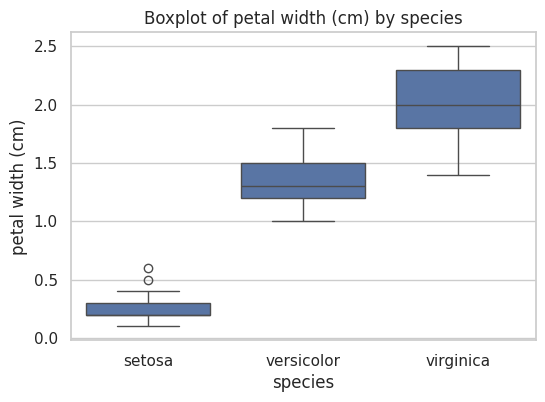

In [13]:
# 각 특성의 boxplot으로 품종별 분포 비교
for feature in feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='species', y=feature)
    plt.title(f'Boxplot of {feature} by species')
    plt.show()


### 데이터관찰: Pairplot 탐색
_참고: PDF 3.18 데이터관찰 (python)_
pairplot으로 모든 특성 조합의 패턴과 분리 가능성을 확인합니다.


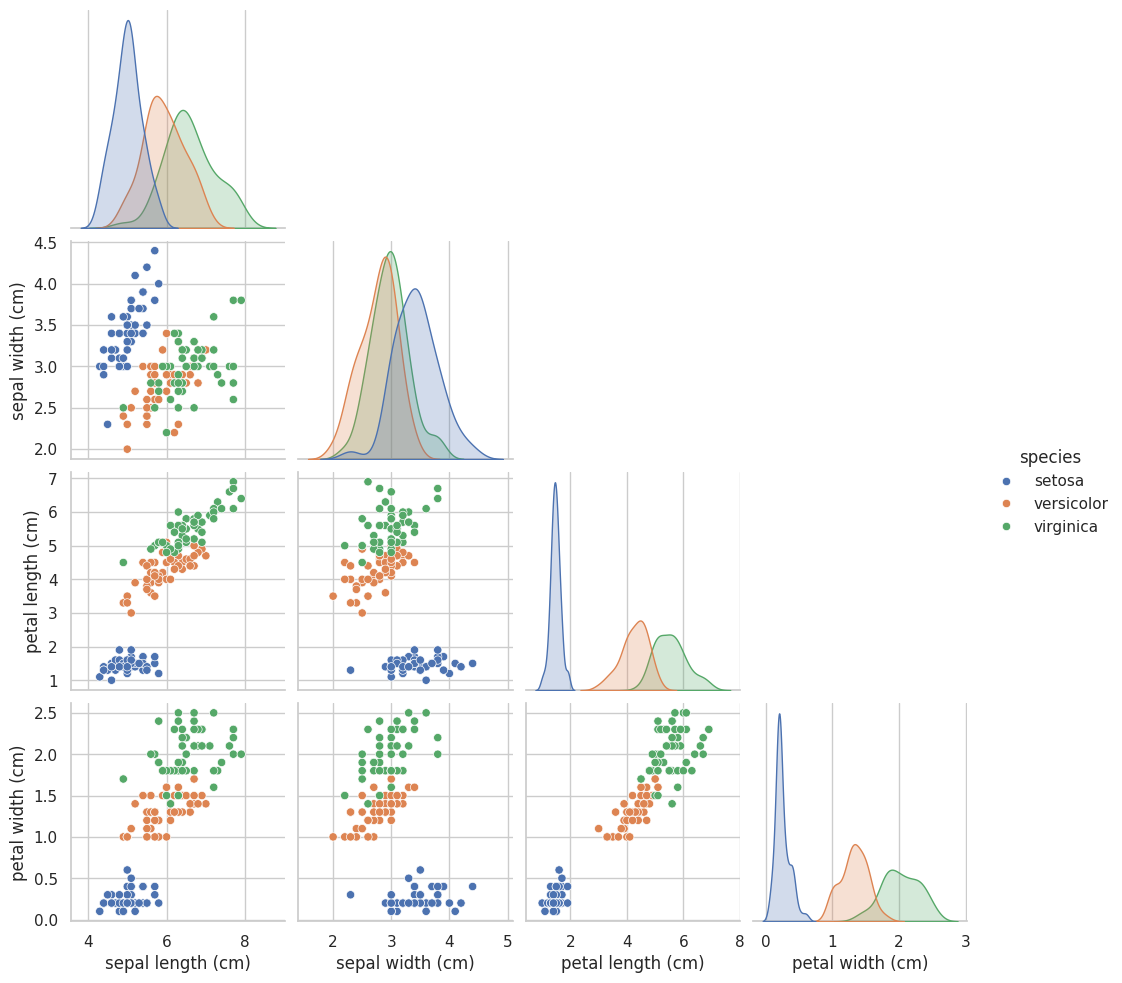

In [14]:
# pairplot으로 특성 조합 전반의 분리 가능성 살피기
sns.pairplot(df, vars=feature_names, hue='species', corner=True)
plt.show()


### 데이터관찰: Petal 집중 산점도
_참고: PDF 3.19-3.20 데이터관찰 (python)_
petal length와 width에 집중해 산점도로 경계를 살펴봅니다.


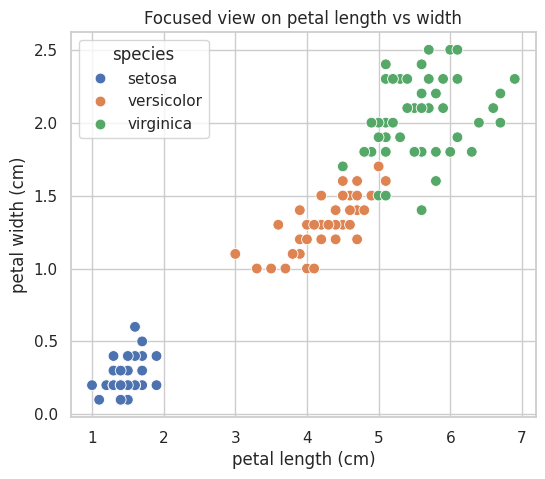

In [15]:
# petal 길이/너비 중심의 산점도로 경계 확인
focus_features = ['petal length (cm)', 'petal width (cm)']
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x=focus_features[0], y=focus_features[1], hue='species', s=60)
plt.title('Focused view on petal length vs width')
plt.show()


### Scikit-Learn: 결정트리 학습
_참고: PDF 5.2 Scikit Learn_
train/test 데이터를 분리하고 결정트리 분류기를 학습합니다.


In [16]:
# train/test 분리 후 얕은 결정나무 학습
X = df[feature_names]
y = df['species_id']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Scikit-Learn: 정확도 평가
_참고: PDF 5.3 Scikit Learn_
훈련·테스트 정확도를 비교해 모델 적합도를 점검합니다.


In [17]:
# train/test 정확도 비교로 일반화 성능 확인
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))

train_acc, test_acc


(0.9833333333333333, 0.9666666666666667)

### 데이터관찰: 새 샘플 예측
_참고: PDF 3.24-3.26 데이터관찰 (python)_
임의 Iris 샘플을 넣어 품종 예측과 확률을 확인합니다.


In [18]:
# 샘플 Iris 입력으로 예측과 확률 확인
example_sample = [[4.3, 2.0, 1.2, 1.0]]
predicted = clf.predict(example_sample)
probabilities = clf.predict_proba(example_sample)

predicted, probabilities


/home/clyde/venvs/tf-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/clyde/venvs/tf-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(array([0]), array([[1., 0., 0.]]))